In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.plotly
import plotly.graph_objs as go
import scipy.stats as stats
# Work with Plotly Offline
from plotly.offline import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_directed = pd.read_csv("Centrality_Directed_Weighted_01062019.csv", sep=";")
df_directed = df_directed[df_directed['Layer'] == "1-Multi"]
df_directed.drop(labels=["Layer", "Node"], axis=1, inplace=True)
# Make list of column name
l_col = list(df_directed.columns[1:])

In [3]:
df_directed.head()

,Label,Strength,StrengthIn,StrengthOut,Degree,DegreeIn,DegreeOut,PageRank,Eigenvector,Hub,Authority,Katz,Multiplexity,Kcore
0,Aalborg,77.84,38.92,38.92,18,9,9,0.026703,0.000226,0.000191,0.000254,0.000237,0.333333,8
1,Aarau,147.84,73.92,73.92,24,12,12,0.038112,0.000443,0.000373,0.000479,0.000420,0.333333,8
2,Aarhus,275.84,137.92,137.92,74,37,37,0.048434,0.002578,0.002221,0.002832,0.002567,0.333333,27
3,Aberdeen,96.84,46.92,49.92,33,15,18,0.026853,0.000022,0.000088,0.000028,0.000106,0.666667,20
4,Abidjan,89.84,44.92,44.92,36,18,18,0.027882,0.000093,0.000076,0.000108,0.000099,0.333333,24


In [4]:
# Getting columns as list
df_directed.columns.to_list()

['Label',
 'Strength',
 'StrengthIn',
 'StrengthOut',
 'Degree',
 'DegreeIn',
 'DegreeOut',
 'PageRank',
 'Eigenvector',
 'Hub',
 'Authority',
 'Katz',
 'Multiplexity',
 'Kcore']

In [5]:
# reorder columns
df_directed = df_directed[['Label',
 'PageRank',
 'Eigenvector',
 'Strength',
 'Degree',
 'StrengthIn',
 'StrengthOut',
 'DegreeIn',
 'DegreeOut',
 'Hub',
 'Authority',
 'Katz',
 'Multiplexity',
 'Kcore']]

In [6]:
df_directed.head()

,Label,PageRank,Eigenvector,Strength,Degree,StrengthIn,StrengthOut,DegreeIn,DegreeOut,Hub,Authority,Katz,Multiplexity,Kcore
0,Aalborg,0.026703,0.000226,77.84,18,38.92,38.92,9,9,0.000191,0.000254,0.000237,0.333333,8
1,Aarau,0.038112,0.000443,147.84,24,73.92,73.92,12,12,0.000373,0.000479,0.000420,0.333333,8
2,Aarhus,0.048434,0.002578,275.84,74,137.92,137.92,37,37,0.002221,0.002832,0.002567,0.333333,27
3,Aberdeen,0.026853,0.000022,96.84,33,46.92,49.92,15,18,0.000088,0.000028,0.000106,0.666667,20
4,Abidjan,0.027882,0.000093,89.84,36,44.92,44.92,18,18,0.000076,0.000108,0.000099,0.333333,24


In [7]:
'''
df_directed['Multiplexity'], df_directed['Kcore'] = df_directed['Kcore'], df_directed['Multiplexity']
df_directed.rename(columns={'Multiplexity':'Kcore', 'Kcore':'Multiplexity'}, inplace=True)
df_directed.head()
''';

In [8]:
'''
df_directed['Strength'], df_directed['StrengthIn'], df_directed['PageRank'], df_directed['Eigenvector'], \
df_directed['Degree'], df_directed['StrengthOut'] = \
df_directed['PageRank'], df_directed['Eigenvector'], df_directed['Strength'], df_directed['StrengthIn'], \
df_directed['StrengthOut'], df_directed['Degree']

df_directed.rename(columns={'Strength':'PageRank', 'StrengthIn':'Eigenvector', 'PageRank':'Strength', \
                           'Eigenvector':'StrengthIn', 'Degree':'StrengthOut', 'StrengthOut':'Degree'}, inplace=True)
df_directed.head()
''';

In [9]:
'''
df_directed['Strength'], df_directed['DegreeIn'], df_directed['DegreeOut'], df_directed['StrengthOut'] = \
df_directed['StrengthOut'], df_directed['DegreeOut'], df_directed['DegreeIn'], df_directed['Strength']

df_directed.rename(columns={'Strength':'StrengthOut', 'DegreeIn':'DegreeOut', 'DegreeOut':'DegreeIn', \
                           'SrengthOut':'Strength'}, inplace=True)

df_directed.head()
''';

In [10]:
# Delete StrengthIn, StrengthOut, DegreeIn, DegreeOut
# It is basically just telling the redundant information of total strength and degree
#df_directed.drop(labels=['StrengthIn', 'StrengthOut', 'DegreeIn', 'DegreeOut'], axis = 1, inplace=True)
#df_directed.head()

In [11]:
df_directed['Multiplexity'] = df_directed['Multiplexity'].round(2)

In [12]:
# split data table into data X and class labels y

X = df_directed.iloc[:,1:13].values
y = df_directed.iloc[:,13].values

In [13]:
y_columns = list(df_directed.iloc[:,1:13].columns)

In [14]:
df_directed.head()

,Label,PageRank,Eigenvector,Strength,Degree,StrengthIn,StrengthOut,DegreeIn,DegreeOut,Hub,Authority,Katz,Multiplexity,Kcore
0,Aalborg,0.026703,0.000226,77.84,18,38.92,38.92,9,9,0.000191,0.000254,0.000237,0.33,8
1,Aarau,0.038112,0.000443,147.84,24,73.92,73.92,12,12,0.000373,0.000479,0.000420,0.33,8
2,Aarhus,0.048434,0.002578,275.84,74,137.92,137.92,37,37,0.002221,0.002832,0.002567,0.33,27
3,Aberdeen,0.026853,0.000022,96.84,33,46.92,49.92,15,18,0.000088,0.000028,0.000106,0.67,20
4,Abidjan,0.027882,0.000093,89.84,36,44.92,44.92,18,18,0.000076,0.000108,0.000099,0.33,24


# Exploratory Visualization

In [15]:
# To Do Later
# https://plot.ly/ipython-notebooks/principal-component-analysis/

# Standarizing

In [16]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# 1. Eigendecomposition -  Computing Eigenvectors and Eigenvalues

In [17]:
# Covariance Matrix

In [18]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[1.0017452  0.63094513 0.9914969  0.84743919 0.99143376 0.99143351
  0.84548576 0.84879688 0.69985914 0.55862446 0.63761706 0.3781178 ]
 [0.63094513 1.0017452  0.6731843  0.49886919 0.67337545 0.67290984
  0.49580074 0.50156093 0.99004127 0.99404361 0.99826966 0.36843515]
 [0.9914969  0.6731843  1.0017452  0.84018387 1.00168056 1.00168199
  0.83748502 0.84228174 0.73521004 0.60613509 0.67904781 0.41546028]
 [0.84743919 0.49886919 0.84018387 1.0017452  0.84135674 0.83891736
  1.0014018  1.00141105 0.55496996 0.43521806 0.49995503 0.45383481]
 [0.99143376 0.67337545 1.00168056 0.84135674 1.0017452  1.00148951
  0.83873375 0.843379   0.73455589 0.60661114 0.67864712 0.41696558]
 [0.99143351 0.67290984 1.00168199 0.83891736 1.00148951 1.0017452
  0.83614384 0.84108974 0.73576363 0.6055874  0.67935788 0.41391893]
 [0.84548576 0.49580074 0.83748502 1.0014018  0.83873375 0.83614384
  1.0017452  1.00039038 0.5517278  0.43242076 0.49691889 0.45190742]
 [0.84879688 0.50156093

In [19]:
# Pake function numpy untuk covariance
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[1.0017452  0.63094513 0.9914969  0.84743919 0.99143376 0.99143351
  0.84548576 0.84879688 0.69985914 0.55862446 0.63761706 0.3781178 ]
 [0.63094513 1.0017452  0.6731843  0.49886919 0.67337545 0.67290984
  0.49580074 0.50156093 0.99004127 0.99404361 0.99826966 0.36843515]
 [0.9914969  0.6731843  1.0017452  0.84018387 1.00168056 1.00168199
  0.83748502 0.84228174 0.73521004 0.60613509 0.67904781 0.41546028]
 [0.84743919 0.49886919 0.84018387 1.0017452  0.84135674 0.83891736
  1.0014018  1.00141105 0.55496996 0.43521806 0.49995503 0.45383481]
 [0.99143376 0.67337545 1.00168056 0.84135674 1.0017452  1.00148951
  0.83873375 0.843379   0.73455589 0.60661114 0.67864712 0.41696558]
 [0.99143351 0.67290984 1.00168199 0.83891736 1.00148951 1.0017452
  0.83614384 0.84108974 0.73576363 0.6055874  0.67935788 0.41391893]
 [0.84548576 0.49580074 0.83748502 1.0014018  0.83873375 0.83614384
  1.0017452  1.00039038 0.5517278  0.43242076 0.49691889 0.45190742]
 [0.84879688 0.5

In [20]:
# Eigendecomposition of covariance matrix
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-3.14847671e-01 -1.59211734e-01 -1.87941815e-01  3.08489451e-01
   2.49214314e-01 -8.23050617e-01 -3.98156068e-02  6.23516157e-02
   3.25358835e-03 -5.56912875e-03  8.94481289e-14  1.56431131e-13]
 [-2.77494488e-01  4.04446689e-01  9.17775008e-03 -1.11541457e-01
  -9.41883620e-02 -7.52573312e-02  6.47491469e-01 -4.17663555e-02
  -9.75923140e-03 -5.57919323e-01  8.90466804e-12  1.27883159e-11]
 [-3.20791460e-01 -1.22824919e-01 -1.47885323e-01  3.26903967e-01
  -1.37863310e-01  2.59099437e-01  6.81930420e-03 -2.11665400e-02
   2.36695532e-03  5.08153847e-04  7.47008054e-01 -2.56589994e-01]
 [-2.92727157e-01 -3.03983680e-01  4.96351831e-02 -3.90771663e-01
  -7.95520886e-03  1.11584866e-02 -2.56983423e-03  6.08739095e-03
   9.21550223e-04  5.55819295e-04 -3.29529878e-01 -7.75035443e-01]
 [-3.20913456e-01 -1.23452721e-01 -1.45778305e-01  3.24487233e-01
  -1.76058175e-01  2.32380880e-01  9.26656662e-02 -1.02971037e-01
  -6.85355665e-01  1.28466136e-01 -3.71447269e-01  1.27588

In [21]:
# Correlation matrix
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-3.14847671e-01 -1.59211734e-01 -1.87941815e-01  3.08489451e-01
   2.49214314e-01 -8.23050617e-01 -3.98156068e-02  6.23516157e-02
   3.25358835e-03 -5.56912875e-03 -1.37449981e-13  3.37345887e-14]
 [-2.77494488e-01  4.04446689e-01  9.17775008e-03 -1.11541457e-01
  -9.41883620e-02 -7.52573312e-02  6.47491469e-01 -4.17663555e-02
  -9.75923140e-03 -5.57919323e-01 -1.04341469e-11  3.46125603e-12]
 [-3.20791460e-01 -1.22824919e-01 -1.47885323e-01  3.26903967e-01
  -1.37863310e-01  2.59099437e-01  6.81930420e-03 -2.11665400e-02
   2.36695532e-03  5.08153859e-04  2.80346761e-01  7.83979935e-01]
 [-2.92727157e-01 -3.03983680e-01  4.96351831e-02 -3.90771663e-01
  -7.95520886e-03  1.11584866e-02 -2.56983423e-03  6.08739095e-03
   9.21550223e-04  5.55819274e-04  7.66763625e-01 -2.28028694e-01]
 [-3.20913456e-01 -1.23452721e-01 -1.45778305e-01  3.24487233e-01
  -1.76058175e-01  2.32380880e-01  9.26656662e-02 -1.02971037e-01
  -6.85355665e-01  1.28466136e-01 -1.39401494e-01 -3.89831

In [22]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-3.14847671e-01 -1.59211734e-01 -1.87941815e-01  3.08489451e-01
   2.49214314e-01 -8.23050617e-01 -3.98156068e-02  6.23516157e-02
   3.25358835e-03 -5.56912875e-03  5.77947981e-14  8.71049541e-14]
 [-2.77494488e-01  4.04446689e-01  9.17775008e-03 -1.11541457e-01
  -9.41883620e-02 -7.52573312e-02  6.47491469e-01 -4.17663555e-02
  -9.75923140e-03 -5.57919323e-01  5.69028550e-12  9.35306947e-12]
 [-3.20791460e-01 -1.22824919e-01 -1.47885323e-01  3.26903967e-01
  -1.37863310e-01  2.59099437e-01  6.81930420e-03 -2.11665400e-02
   2.36695531e-03  5.08153866e-04  8.16407217e-01 -3.17917263e-01]
 [-2.92727157e-01 -3.03983680e-01  4.96351831e-02 -3.90771663e-01
  -7.95520886e-03  1.11584866e-02 -2.56983423e-03  6.08739095e-03
   9.21550223e-04  5.55819300e-04 -1.05188174e-02 -7.51966493e-01]
 [-3.20913456e-01 -1.23452721e-01 -1.45778305e-01  3.24487233e-01
  -1.76058175e-01  2.32380880e-01  9.26656662e-02 -1.02971037e-01
  -6.85355665e-01  1.28466136e-01 -4.05955772e-01  1.58083

In [23]:
# Singular vector decomposition for computation efficiency
u,s,v = np.linalg.svd(X_std.T)
u

array([[-3.14847671e-01,  1.59211734e-01, -1.87941815e-01,
         3.08489451e-01,  2.49214314e-01,  8.23050617e-01,
         3.98156068e-02, -6.23516157e-02,  3.25358835e-03,
         5.56912875e-03, -5.36880929e-16, -3.39082692e-16],
       [-2.77494488e-01, -4.04446689e-01,  9.17775008e-03,
        -1.11541457e-01, -9.41883620e-02,  7.52573312e-02,
        -6.47491469e-01,  4.17663555e-02, -9.75923140e-03,
         5.57919323e-01, -1.95086389e-16, -2.98631632e-16],
       [-3.20791460e-01,  1.22824919e-01, -1.47885323e-01,
         3.26903967e-01, -1.37863310e-01, -2.59099437e-01,
        -6.81930420e-03,  2.11665400e-02,  2.36695531e-03,
        -5.08153858e-04, -2.43968520e-01, -7.79173133e-01],
       [-2.92727157e-01,  3.03983680e-01,  4.96351831e-02,
        -3.90771663e-01, -7.95520886e-03, -1.11584866e-02,
         2.56983423e-03, -6.08739095e-03,  9.21550221e-04,
        -5.55819293e-04, -7.79099824e-01,  2.43945566e-01],
       [-3.20913456e-01,  1.23452721e-01, -1.4577830

In [24]:
s

array([7.11118613e+01, 3.32376286e+01, 2.14675051e+01, 1.56618604e+01,
       3.37385663e+00, 2.54193666e+00, 1.25512749e+00, 8.47905747e-01,
       2.61353373e-01, 9.29465953e-02, 5.06207059e-15, 1.76576604e-15])

# 2. Selecting Principal Components

In [25]:
#for ev in eig_vecs:
#    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev), decimal=2)
#print('Everything ok!')

In [26]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
#eig_pairs.sort()
#eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
8.809924760029372
1.924634073323948
0.8028811396401769
0.42734123900080023
0.019830851104257786
0.01125686753172698
0.0027445034951231514
0.0012525159523048368
0.00011899927840808408
1.5050643879849411e-05
1.0427959077882732e-16
3.099423090237559e-16


In [27]:
# Check top 5 K-Core value
top_kcore = df_directed.groupby(by='Kcore').count()['Label'].sort_values(ascending=False).head(5)

In [28]:
top_kcore

Kcore
4     116
6      82
8      63
10     34
38     34
Name: Label, dtype: int64

In [29]:
set(df_directed['Kcore'])

{3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 16,
 17,
 18,
 20,
 22,
 23,
 24,
 26,
 27,
 28,
 30,
 31,
 32,
 34,
 35,
 36,
 38,
 40}

In [30]:
top_kcore_index = tuple(list(top_kcore.index))

In [31]:
'''
colors_top_kcore = {2: '#0D76BF', 
          4: '#1b4ee7', 
          6: '#39da2b',
          8: '#050505',
          36: '#c90dfd',
          12: '#c90dfd',
          10: '#c90dfd',
          18: '#c90dfd',
          16: '#c90dfd',
          22: '#c90dfd'}
'''

colors_top_kcore = {34: '#fe0000', 
          35: '#03dac5', 
          36: '#0bff01',
          38: '#011efe',
          40: '#fe00f6'}

In [32]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in eig_vals]
cum_var_exp = np.cumsum(var_exp)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,13)],
    #x=['PC-%s' %i for i in y_columns],
    y=np.real(var_exp),
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,13)],
    #x=['PC-%s' %i for i in y_columns],
    y=np.real(cum_var_exp),
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
plotly.offline.plot(fig, filename='selecting-principal-components')

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `selecting-principal-components` didn't end with .html. Adding .html to the end of your file.



'file:///Users/andreas.yunus/Desktop/Graduation/selecting-principal-components.html'

In [33]:
'''
matrix_w = np.hstack((eig_pairs[0][1].reshape(8,1), 
                      eig_pairs[1][1].reshape(8,1)))

print('Matrix W:\n', matrix_w)
''';

In [34]:
# Projection into a new space
# Unused - replaced by Scikit learn algorithm
'''
Y = X_std.dot(matrix_w)

data = []

for name, col in zip((0.33, 0.67, 1.00), colors.values()):
    trace = dict(
        type='scatter',
        x=Y[y==name,0],
        y=Y[y==name,1],
        mode='markers',
        name=name,
        marker=dict(
            color=col,
            size=12,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8)
    )
    data.append(trace)

layout = dict(
    showlegend=True,
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2')
    )
)

fig = dict(data=data, layout=layout)
plotly.offline.plot(fig, filename='projection-matrix')
''';

# Top K-Core

In [35]:
# SK Learn Implementation

In [36]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [37]:
X_std

array([[-0.24140361, -0.23878245, -0.24721651, ..., -0.25669659,
        -0.2369847 , -0.45066581],
       [-0.02383609, -0.2355591 , -0.08309716, ..., -0.25378138,
        -0.23417581, -0.45066581],
       [ 0.17302043, -0.2039261 ,  0.21700679, ..., -0.22334203,
        -0.20122136, -0.45066581],
       ...,
       [ 1.45168605,  1.65729692,  1.64484512, ...,  1.46778225,
         1.62031117,  3.99450111],
       [-0.20821723, -0.24185252, -0.24721651, ..., -0.25976042,
        -0.24028649, -0.45066581],
       [-0.22118828, -0.23919127, -0.21908177, ..., -0.25715643,
        -0.23810433, -0.45066581]])

In [38]:
data = []

for name, col in zip((34,35,36,38,40), colors_top_kcore.values()):

    trace = dict(
        type='scatter',
        x=Y_sklearn[y==name,0],
        y=Y_sklearn[y==name,1],
        mode='markers',
        name=name,
        marker=dict(
            color=col,
            size=12,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8)
    )
    data.append(trace)

layout = dict(
        xaxis=dict(title='PC1', showline=False),
        yaxis=dict(title='PC2', showline=False)
)
fig = dict(data=data, layout=layout)
plotly.offline.plot(fig, filename='pca-scikitlearn')

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `pca-scikitlearn` didn't end with .html. Adding .html to the end of your file.



'file:///Users/andreas.yunus/Desktop/Graduation/pca-scikitlearn.html'

In [39]:
sklearn_pca.components_

array([[ 0.31484767,  0.27749449,  0.32079146,  0.29272716,  0.32091346,
         0.3206301 ,  0.29191087,  0.29333575,  0.2910766 ,  0.26015591,
         0.27828808,  0.16844448],
       [ 0.15921173, -0.40444669,  0.12282492,  0.30398368,  0.12345272,
         0.12218848,  0.3056185 ,  0.30216683, -0.35300074, -0.4472784 ,
        -0.40214986,  0.04808745]])

In [40]:
df_comp = pd.DataFrame(sklearn_pca.components_,index=['PC 1', 'PC 2'], columns=y_columns)

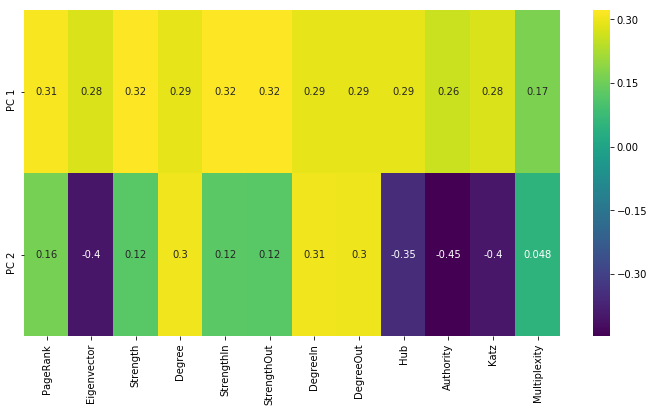

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='viridis',annot=True)

In [42]:
df_directed.head()

,Label,PageRank,Eigenvector,Strength,Degree,StrengthIn,StrengthOut,DegreeIn,DegreeOut,Hub,Authority,Katz,Multiplexity,Kcore
0,Aalborg,0.026703,0.000226,77.84,18,38.92,38.92,9,9,0.000191,0.000254,0.000237,0.33,8
1,Aarau,0.038112,0.000443,147.84,24,73.92,73.92,12,12,0.000373,0.000479,0.000420,0.33,8
2,Aarhus,0.048434,0.002578,275.84,74,137.92,137.92,37,37,0.002221,0.002832,0.002567,0.33,27
3,Aberdeen,0.026853,0.000022,96.84,33,46.92,49.92,15,18,0.000088,0.000028,0.000106,0.67,20
4,Abidjan,0.027882,0.000093,89.84,36,44.92,44.92,18,18,0.000076,0.000108,0.000099,0.33,24


In [43]:
# should I see the PCA and investigate the clusters by degree of K-core (yg paling besar)
# atau by cluster in K-core - by number of members

# Adding TEU data to focus on 15 European Hubs

In [44]:
# Rank the ports based on Borda Count Methods
# Preference-based Ranking
# List of Busiest Port in Europe as per TEU in 2018. No data for 2019
# https://www.porteconomics.eu/2019/03/02/portgraphic-top15-container-ports-in-europe-in-2018/

# Make dictionary
port_teu_dict = {"Ports":["Rotterdam", "Antwerp", "Hamburg", 
            "Bremerhaven", "Valencia", "Piraeus",
           "Algeciras", "Felixstowe", "Barcelona",
           "Marsaxlokk", "Le_Havre", "Genoa",
           "Gioia_Tauro", "Southampton","Gdansk"], "TEU":[14513,11100,8730,5467,5104,4908,4772,4161,3423,3310,2884,2609,2301,1995,1949]}

port_teu = pd.DataFrame.from_dict(data=port_teu_dict)

df_directed.set_index('Label', inplace=True)

df_top15 = df_directed.loc[list(port_teu_dict['Ports'])]

# Remove Genoa from list - data not available - NaN
df_top15.dropna(inplace=True)

# Remove genoa TEU
genoa = list(port_teu['TEU'])
genoa.pop(11)

# add TEU data
df_top15['TEU'] = genoa

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



In [45]:
df_top15.head()

,PageRank,Eigenvector,Strength,Degree,StrengthIn,StrengthOut,DegreeIn,DegreeOut,Hub,Authority,Katz,Multiplexity,Kcore,TEU
Label,,,,,,,,,,,,,,
Rotterdam,1.000000,1.000000,7903.84,553.0,3909.92,3993.92,274.0,279.0,1.000000,1.000000,1.000000,1.00,38.0,14513
Antwerp,0.436935,0.639843,3532.84,384.0,1775.92,1756.92,189.0,195.0,0.566561,0.657466,0.580793,1.00,38.0,11100
Hamburg,0.587704,0.023401,4584.84,297.0,2284.92,2299.92,149.0,148.0,0.018690,0.027228,0.022904,1.00,38.0,8730
Bremerhaven,0.294168,0.016266,2314.84,243.0,1165.92,1148.92,118.0,125.0,0.013564,0.018356,0.016111,0.67,38.0,5467
Valencia,0.072385,0.000765,361.84,140.0,181.92,179.92,71.0,69.0,0.000895,0.000848,0.001024,0.67,38.0,5104


In [46]:
df_top15.columns.to_list()

['PageRank',
 'Eigenvector',
 'Strength',
 'Degree',
 'StrengthIn',
 'StrengthOut',
 'DegreeIn',
 'DegreeOut',
 'Hub',
 'Authority',
 'Katz',
 'Multiplexity',
 'Kcore',
 'TEU']

In [47]:
df_top15.drop(labels=['StrengthIn',
 'StrengthOut',
 'DegreeIn',
 'DegreeOut',
 'Hub',
 'Authority',
 'Katz'], axis=1, inplace=True)

In [48]:
df_top15

,PageRank,Eigenvector,Strength,Degree,Multiplexity,Kcore,TEU
Label,,,,,,,
Rotterdam,1.000000,1.000000,7903.84,553.0,1.00,38.0,14513
Antwerp,0.436935,0.639843,3532.84,384.0,1.00,38.0,11100
Hamburg,0.587704,0.023401,4584.84,297.0,1.00,38.0,8730
Bremerhaven,0.294168,0.016266,2314.84,243.0,0.67,38.0,5467
Valencia,0.072385,0.000765,361.84,140.0,0.67,38.0,5104
Piraeus,0.072017,0.001204,370.84,133.0,0.33,38.0,4908
Algeciras,0.066758,0.000776,297.84,109.0,0.67,35.0,4772
Felixstowe,0.142163,0.002409,724.84,117.0,0.67,38.0,4161
Barcelona,0.052110,0.000556,274.84,110.0,0.67,38.0,3423


# Check Ranking one by one

In [49]:
df_top15_degree = df_top15.sort_values(by='Degree', ascending=False).index
df_top15_PageRank = df_top15.sort_values(by='PageRank', ascending=False).index
df_top15_eigen = df_top15.sort_values(by='Eigenvector', ascending=False).index
df_top15_strength = df_top15.sort_values(by='Strength', ascending=False).index
df_top15_multiplexity = df_top15.sort_values(by='Multiplexity', ascending=False).index
df_top15_Kcore = df_top15.sort_values(by='Kcore', ascending=False).index
df_top15_TEU = df_top15.index

# Borda Count

In [50]:
dict_degree = {df_top15_degree[x]:x+1 for x in range(len(df_top15_degree))}
dict_PageRank = {df_top15_PageRank[x]:x+1 for x in range(len(df_top15_PageRank))}
dict_eigen = {df_top15_eigen[x]:x+1 for x in range(len(df_top15_eigen))}
dict_strength = {df_top15_strength[x]:x+1 for x in range(len(df_top15_strength))}
#dict_multiplexity = {df_top15_multiplexity[x]:x+1 for x in range(len(df_top15_multiplexity))}
#dict_kcore = {df_top15_Kcore[x]:x+1 for x in range(len(df_top15_Kcore))}
dict_TEU = {df_top15_TEU[x]:x+1 for x in range(len(df_top15_TEU))}

In [51]:
# Set rank multiplexity - algorithm is different because there is same value
set_multiplexity = sorted(list(set(df_top15['Multiplexity'])), reverse=True)
dict_rank_multiplexity = {set_multiplexity[x]:x+1 for x in range(len(set_multiplexity))}
dict_multiplexity = {df_top15_multiplexity[x]:dict_rank_multiplexity[df_top15['Multiplexity'][x]] for x in range(len(df_top15_multiplexity))}

In [52]:
# Set rank kcore - algorithm is different because there is same value
set_kcore = sorted(list(set(df_top15['Kcore'])), reverse=True)
dict_rank_kcore = {set_kcore[x]:x+1 for x in range(len(set_kcore))}
dict_kcore = {df_top15_Kcore[x]:dict_rank_kcore[df_top15['Kcore'][x]] for x in range(len(df_top15_Kcore))}

In [53]:
df15_index = list(df_top15.index)

In [54]:
dict_borda = dict()
for i, j in enumerate(df15_index):
    dict_borda[j] = dict_degree[j] + dict_PageRank[j] + dict_eigen[j] + dict_multiplexity[j] + dict_kcore[j] + dict_TEU[j]

In [55]:
df_sorted_borda = pd.DataFrame(columns=['Borda_count'], index=list(dict_borda.keys()))

In [56]:
for i, j in dict_borda.items():
    df_sorted_borda.loc[i] = j

In [57]:
df_sorted_borda.sort_values(by='Borda_count')

,Borda_count
Rotterdam,6
Antwerp,11
Hamburg,13
Bremerhaven,19
Piraeus,31
Felixstowe,32
Le_Havre,32
Valencia,33
Algeciras,41
Marsaxlokk,42
